In [1]:
import torch
import random
import matplotlib.pyplot as plt

In [5]:
torch.normal(0,1,(10,2)), torch.normal(0,0.1,(10,2))

(tensor([[-0.3742, -0.9676],
         [-0.2198,  0.7075],
         [-0.6433, -0.2063],
         [-0.3357, -0.8992],
         [ 0.3952, -0.4705],
         [-0.0848,  1.2938],
         [ 1.0787, -0.9806],
         [ 0.4029,  1.8941],
         [ 2.1257, -1.2268],
         [ 1.0570,  1.5120]]),
 tensor([[ 0.1570, -0.0243],
         [-0.0122,  0.0247],
         [-0.1207, -0.0657],
         [-0.1475,  0.0602],
         [-0.1083,  0.1235],
         [-0.0210, -0.0707],
         [-0.1396, -0.1521],
         [ 0.0818,  0.1081],
         [ 0.1646, -0.0627],
         [ 0.0032,  0.0570]]))

In [22]:
# generating synthetic dataset

import numpy as np

def make_dataset(size=1000, true_weight=torch.tensor([2, -3.4]), true_bias=4.2):
    X = torch.normal(0,1, (size, len(true_weight)))
    y = torch.matmul(X,true_weight) + true_bias
    # now we add for noise, mean =0, standard deviation = 0.1
    y += torch.normal(0,0.1, y.shape)
    return X, y.reshape(-1,1) # this work same as unsqueeze

In [54]:
X, y = make_dataset()

In [28]:
X[0], y[0]

(tensor([-2.0686,  0.3597]), tensor([-1.1781]))

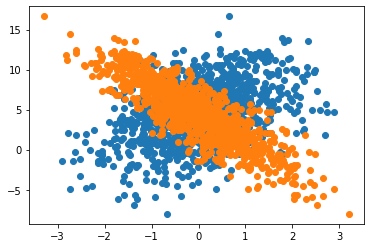

In [41]:
plt.plot(X.detach(),y.detach(),'o')

In [71]:
# reading the dataset, and giving based on batch size

def read_iter(batch_size, features, labels):
    indices = list(range(len(features)))
    random.shuffle(indices)
    new_features = features[indices]
    new_labels = labels[indices]
    
#     print(new_features[:5], features[:5])
    for i in range(0,len(features), batch_size):
        yield new_features[i:min(i+batch_size, len(features))], new_labels[i:min(i+batch_size, len(features))]
        

In [72]:
train_dataloader= read_iter(32, X, y)

In [73]:
for data, label in train_dataloader:
    print(data, label)
    break

tensor([[-0.6252,  1.1764],
        [ 0.7681, -2.2421],
        [-0.7209,  0.7380],
        [-0.7528,  1.1685],
        [ 0.7233,  1.2691],
        [-1.0366,  0.4359],
        [ 0.0494, -1.0319],
        [ 1.6664,  0.6216],
        [ 1.1048,  0.7398],
        [-0.2592,  0.2155],
        [-0.7162, -0.7998],
        [-1.4529, -0.5680],
        [ 0.2821, -1.3985],
        [ 0.6433, -0.1368],
        [ 0.3276,  1.0824],
        [-0.7498, -0.4487],
        [ 0.2847, -0.8668],
        [ 1.2636,  0.1197],
        [-0.2569,  0.4339],
        [-1.8385, -0.8960],
        [-0.2066, -0.6896],
        [-0.6133, -1.5679],
        [ 0.8988, -0.6914],
        [-0.0871, -0.3551],
        [-0.2744, -0.3800],
        [ 0.1386, -0.9058],
        [ 0.4728, -0.9171],
        [-0.5046, -1.1064],
        [ 0.1751,  0.6747],
        [-0.6889, -0.8719],
        [ 0.8057,  1.3331],
        [ 1.0668,  0.5185]]) tensor([[-1.1912],
        [13.6163],
        [ 0.2370],
        [-1.2030],
        [ 1.2484],
        

In [74]:
# we before training would initialize the model
w = torch.normal(0,1, (2,1), requires_grad = True)
b = torch.zeros(1,requires_grad=True)

In [75]:
# define the model

def linreg(X,w,b):
    return torch.matmul(X, w) + b
    

In [76]:
#loss function

def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)**2/2)

In [81]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad/ batch_size
            param.grad.zero_()

In [82]:
lr = 0.03
num_epochs =3
batch_size=32

In [85]:
# training loop
for epoch in range(num_epochs):
    train_dataloader= read_iter(batch_size, X, y)
    for data, target in train_dataloader:
        l = squared_loss(linreg(data,w,b), target)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    
    with torch.no_grad():
        print("Loss for current epoch ", epoch, ":", l.mean())
        
    

Loss for current epoch  0 : tensor(-10.5198)
Loss for current epoch  1 : tensor(-10.5530)
Loss for current epoch  2 : tensor(-10.5862)
